<a href="https://colab.research.google.com/github/Bithika26/portfolio/blob/main/Soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/soil.csv")
df.head()

,Unnamed: 0,pH,N,P,Ca,Mg,K,Na
0,0,5.40,0.188,215,16.35,7.65,0.72,1.14
1,1,5.65,0.165,208,12.25,5.15,0.71,0.94
2,2,5.14,0.260,300,13.02,5.68,0.68,0.60
3,3,5.14,0.169,248,11.92,7.88,1.09,1.01
4,4,5.14,0.164,174,14.17,8.12,0.70,2.17


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48 non-null     int64  
 1   pH          48 non-null     float64
 2   N           48 non-null     float64
 3   P           48 non-null     int64  
 4   Ca          48 non-null     float64
 5   Mg          48 non-null     float64
 6   K           48 non-null     float64
 7   Na          48 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 3.1 KB


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      48 non-null     float64
 1   N       48 non-null     float64
 2   P       48 non-null     int64  
 3   Ca      48 non-null     float64
 4   Mg      48 non-null     float64
 5   K       48 non-null     float64
 6   Na      48 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.8 KB


In [ ]:
df.isnull().sum()

pH    0
N     0
P     0
Ca    0
Mg    0
K     0
Na    0
dtype: int64

In [ ]:
df.corr()

,pH,N,P,Ca,Mg,K,Na
pH,1.000000,0.636654,0.591030,0.808629,-0.395782,0.579573,-0.693261
N,0.636654,1.000000,0.842201,0.850216,-0.521544,0.676003,-0.811935
P,0.591030,0.842201,1.000000,0.687587,-0.488973,0.555727,-0.772857
Ca,0.808629,0.850216,0.687587,1.000000,-0.427496,0.720910,-0.788908
Mg,-0.395782,-0.521544,-0.488973,-0.427496,1.000000,-0.356718,0.564536
K,0.579573,0.676003,0.555727,0.720910,-0.356718,1.000000,-0.693208
Na,-0.693261,-0.811935,-0.772857,-0.788908,0.564536,-0.693208,1.000000


<Axes: >

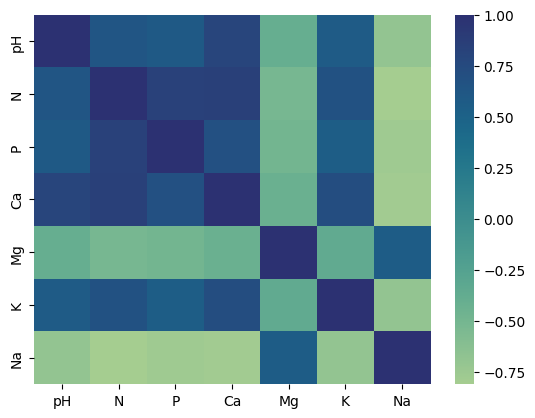

In [ ]:
sns.heatmap(df.corr(),cmap="crest")

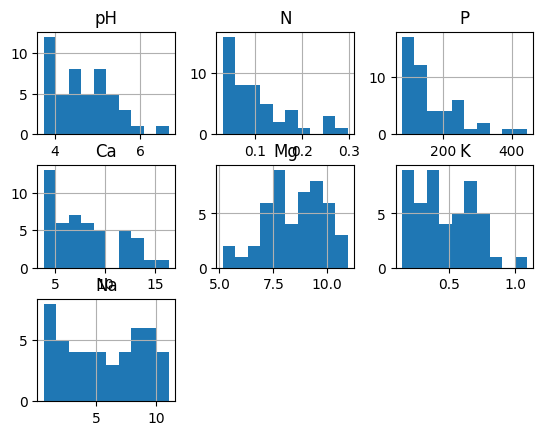

In [ ]:
viz=df.hist()

In [ ]:
X = df[['N','P','Ca','Mg','K','Na']]  # Features
y = df['pH']  # Target variable


X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 0.15192449968298175
R-squared: 0.6225862715028239


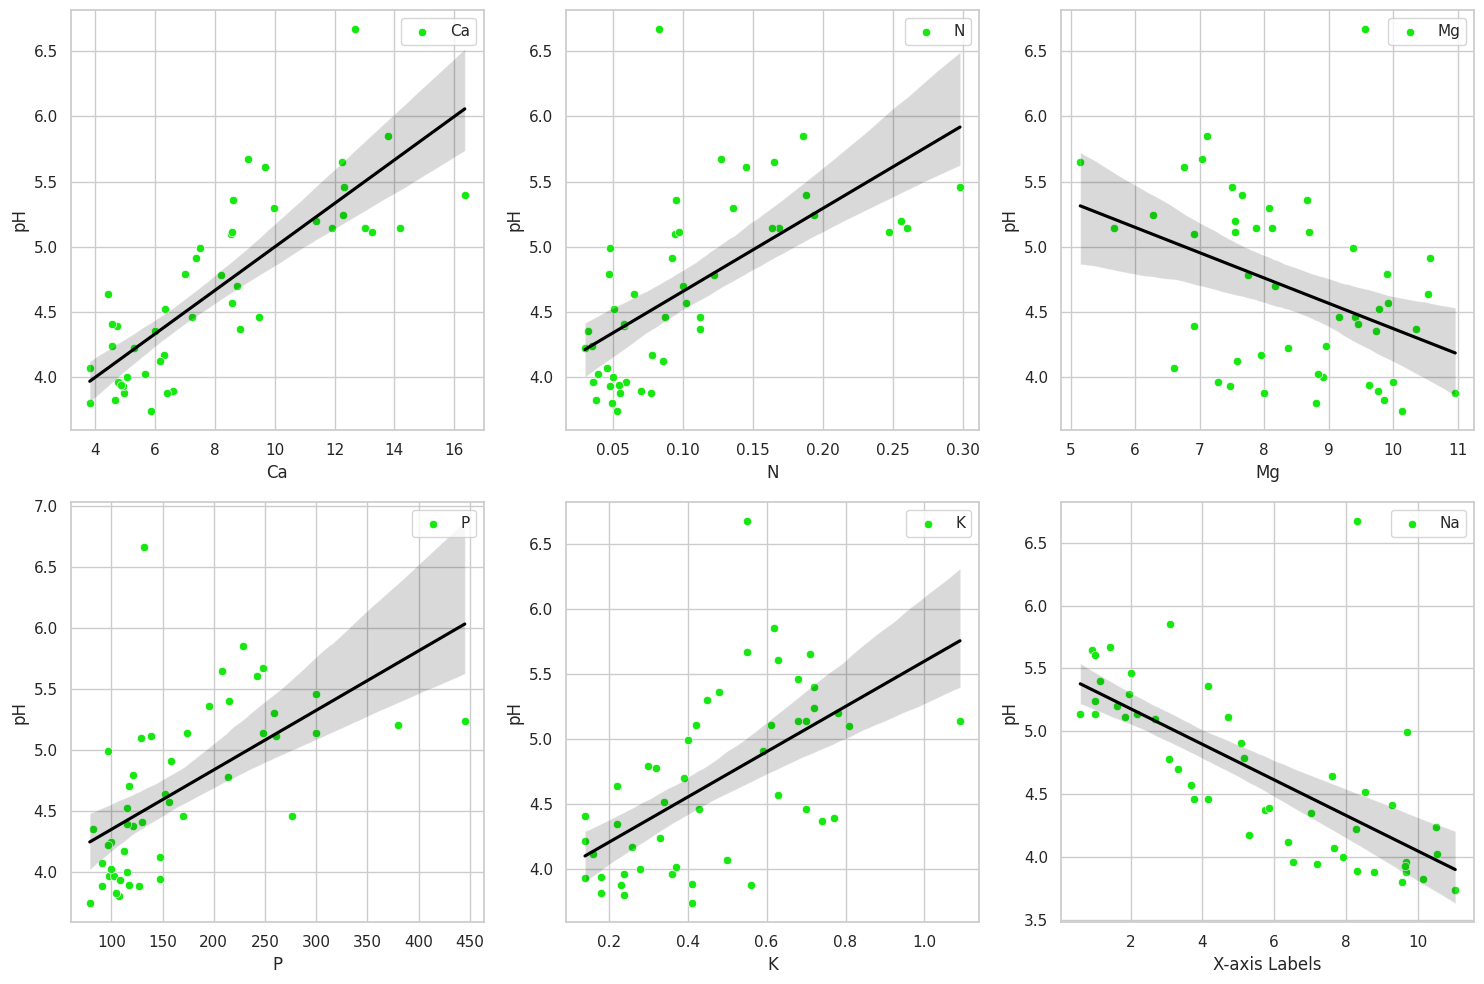

In [ ]:

model = LinearRegression()
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

# Evaluate the model
mse1 = mean_squared_error(y1_test, y1_pred)
r2i = r2_score(y1_test, y1_pred)

print(f'Mean Squared Error: {mse1}')
print(f'R-squared: {r2i}')
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Scatter plot and regression line for each specified column on the x-axis
for idx, column in enumerate(columns_to_plot):
    sns.scatterplot(x=df[column], y=df['pH'], ax=axes[idx], label=column, color='#17e812')
    sns.regplot(x=df[column], y=df['pH'], ax=axes[idx], scatter=False, color='black', line_kws={'label': f'Linear Regression ({column})'})

plt.xlabel("X-axis Labels")
plt.ylabel("pH")
plt.legend()
plt.tight_layout()
plt.show()


Mean Squared Error: 0.15192449968298175
R-squared: 0.6225862715028239
Feature Importance:
  Feature  Coefficient
0       N    -5.067820
1       P     0.001298
2      Ca     0.206914
3      Mg    -0.056705
4       K    -0.119439
5      Na    -0.037167


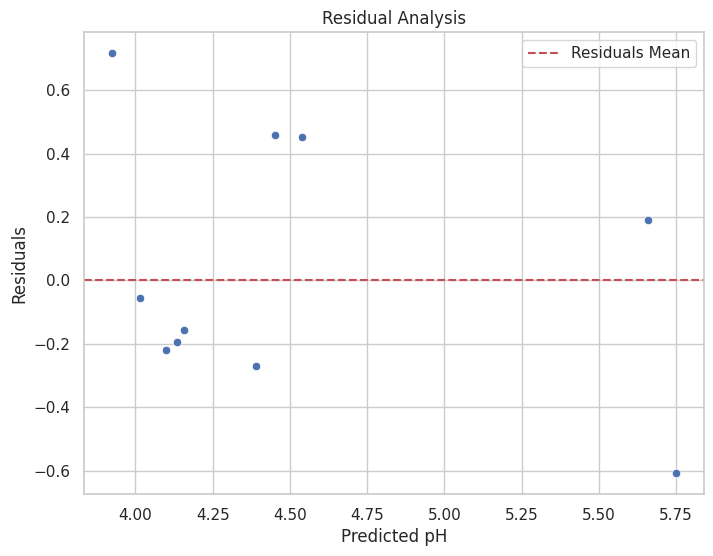

In [ ]:
# Model Evaluation
print(f'Mean Squared Error: {mse1}')
print(f'R-squared: {r2i}')

# Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Importance:")
print(coefficients)

# Residual Analysis
residuals = y1_test - y1_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel("Predicted pH")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Analysis")
plt.show()


Mean Squared Error: 0.20746294405020707
R-squared: 0.43030509782596593


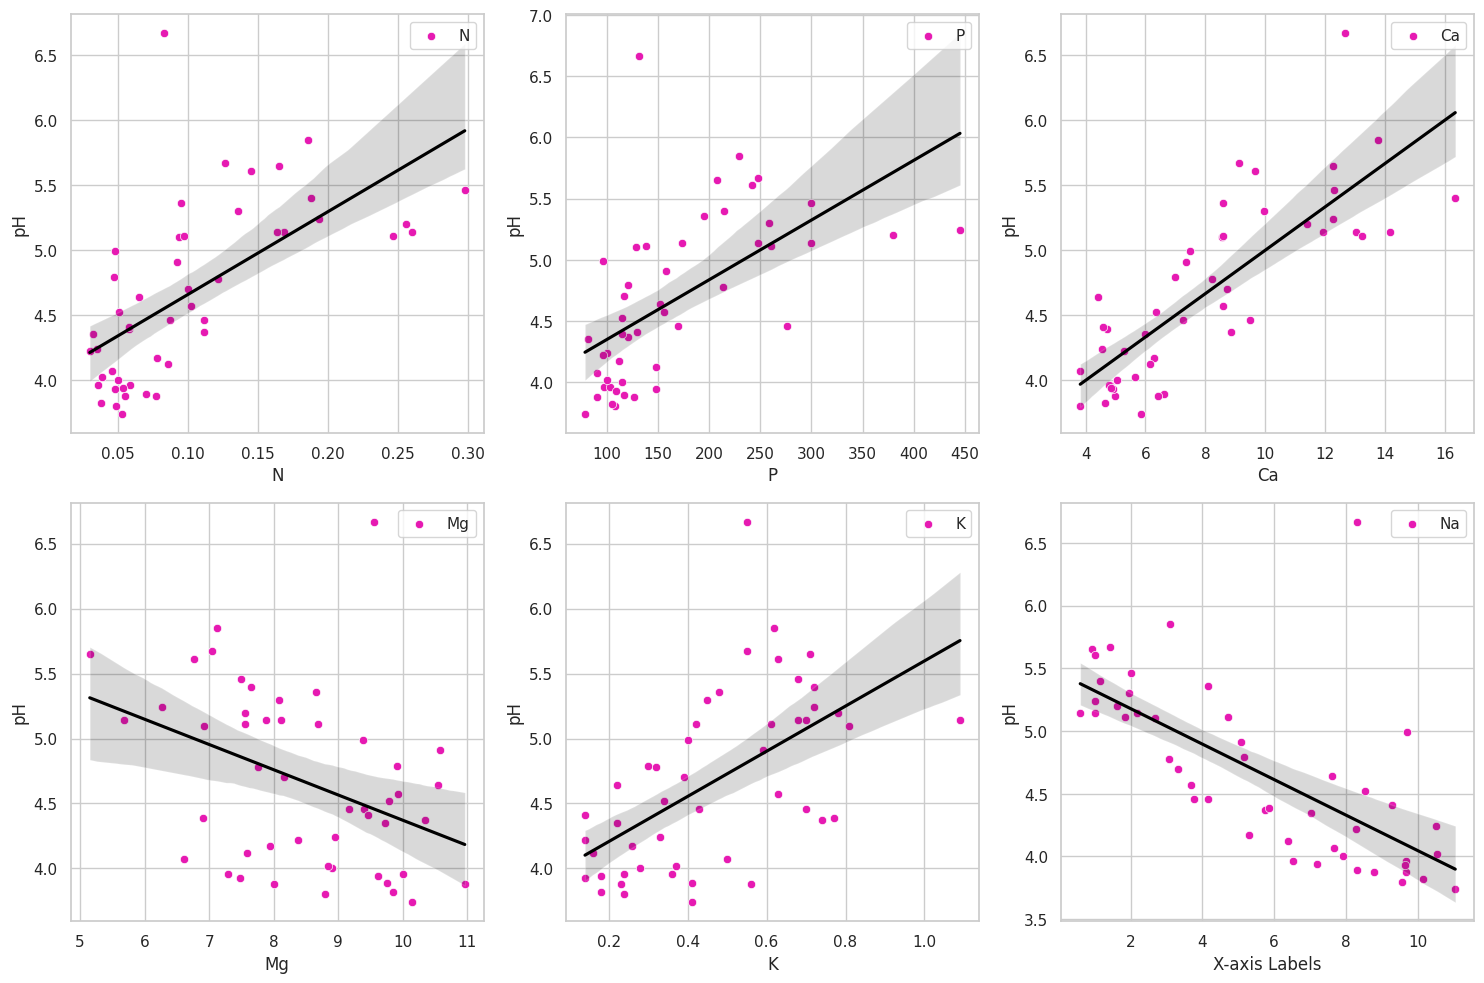

In [ ]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2j = r2_score(y2_test, y2_pred)

print(f'Mean Squared Error: {mse2}')
print(f'R-squared: {r2j}')
sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


axes = axes.flatten()


for idx, column in enumerate(X.columns):
    sns.scatterplot(x=df[column], y=df['pH'], ax=axes[idx], label=column, color='#E61AB2')
    sns.regplot(x=df[column], y=df['pH'], ax=axes[idx], scatter=False, color='black', line_kws={'label': f'Linear Regression ({column})'})


plt.xlabel("X-axis Labels")
plt.ylabel("pH")


plt.tight_layout()
plt.show()


Mean Squared Error: 0.20746294405020707
R-squared: 0.43030509782596593
Feature Importance:
  Feature  Coefficient
0       N    -9.333596
1       P     0.001200
2      Ca     0.264195
3      Mg    -0.069510
4       K    -0.252585
5      Na    -0.059221


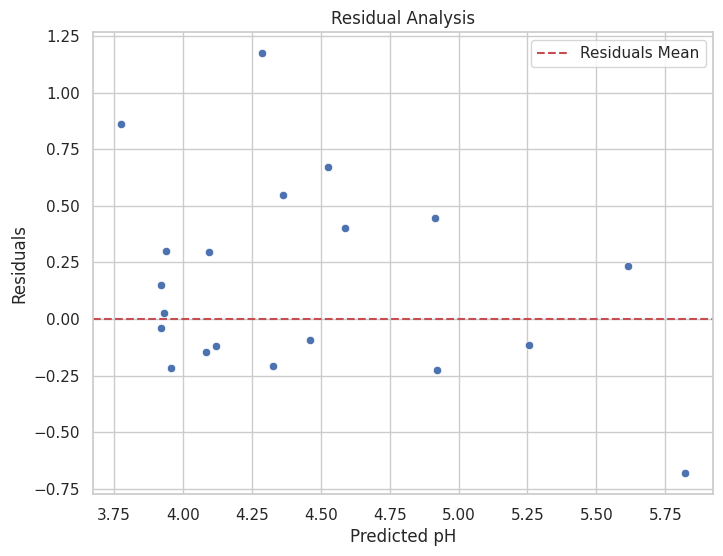

In [ ]:
# Model Evaluation
print(f'Mean Squared Error: {mse2}')
print(f'R-squared: {r2j}')

# Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Importance:")
print(coefficients)

# Residual Analysis
residuals = y2_test - y2_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y2_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel("Predicted pH")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Analysis")
plt.show()


Mean Squared Error: 0.3741124143902028
R-squared: -0.015798464308094617


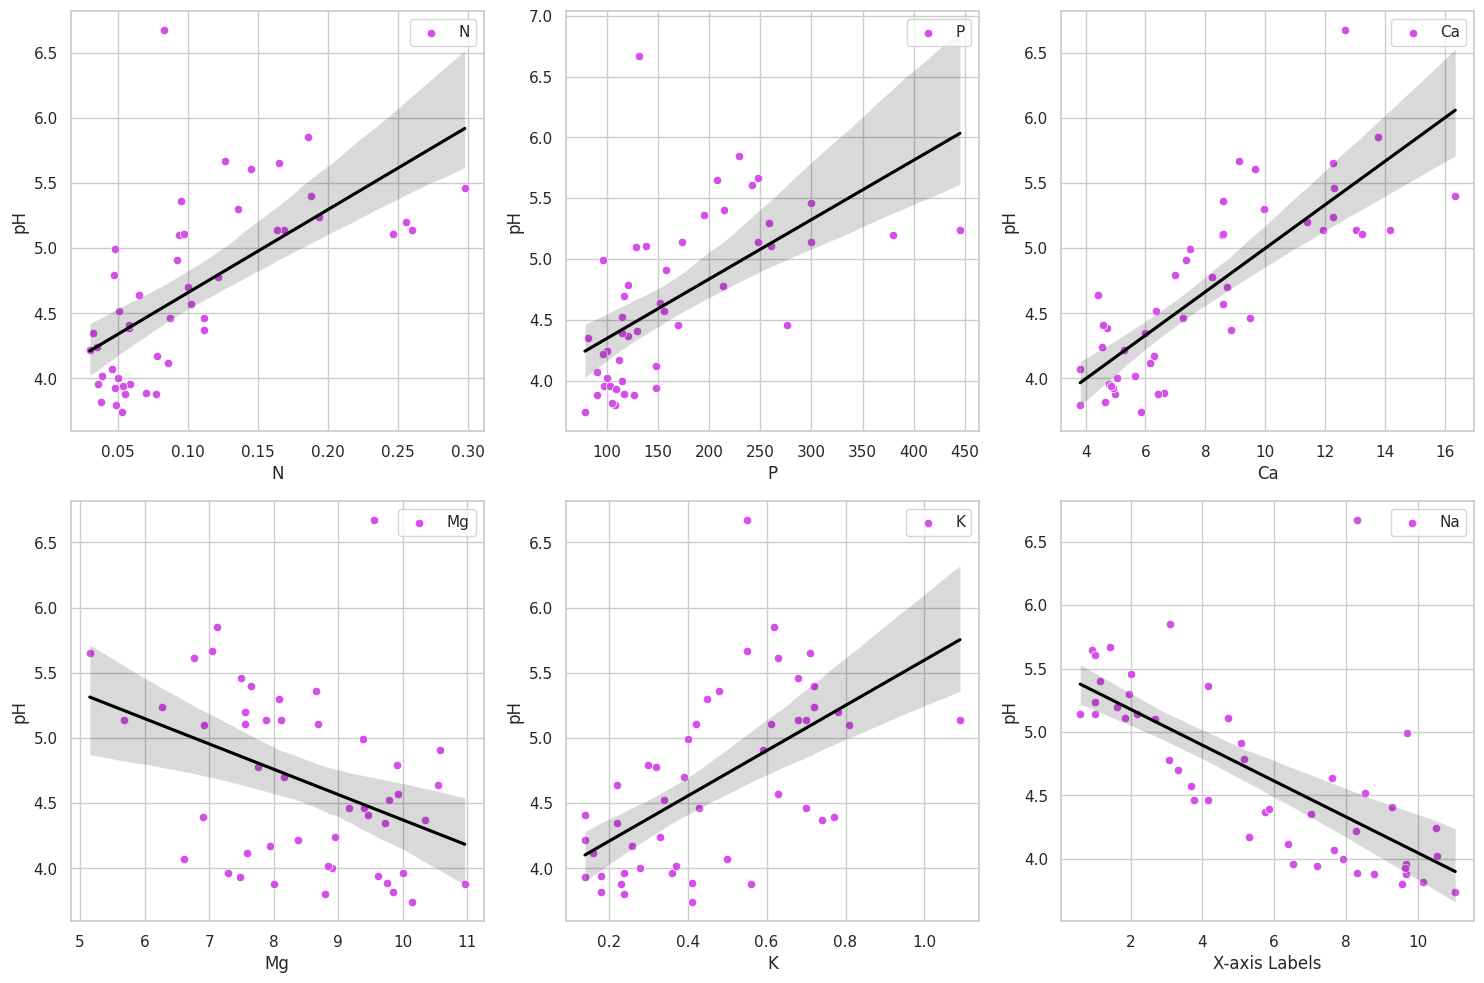

In [ ]:

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.6, random_state=42)

model = LinearRegression()
model.fit(X3_train, y3_train)

y3_pred = model.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_pred)
r2k = r2_score(y3_test, y3_pred)

print(f'Mean Squared Error: {mse3}')
print(f'R-squared: {r2k}')
sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


axes = axes.flatten()


for idx, column in enumerate(X.columns):
    sns.scatterplot(x=df[column], y=df['pH'], ax=axes[idx], label=column, color='#D44FE8')
    sns.regplot(x=df[column], y=df['pH'], ax=axes[idx], scatter=False, color='black', line_kws={'label': f'Linear Regression ({column})'})


plt.xlabel("X-axis Labels")
plt.ylabel("pH")


plt.tight_layout()
plt.show()

Mean Squared Error: 0.3741124143902028
R-squared: -0.015798464308094617
Feature Importance:
  Feature  Coefficient
0       N   -14.054836
1       P     0.004139
2      Ca     0.408415
3      Mg    -0.163442
4       K    -0.876771
5      Na     0.016629


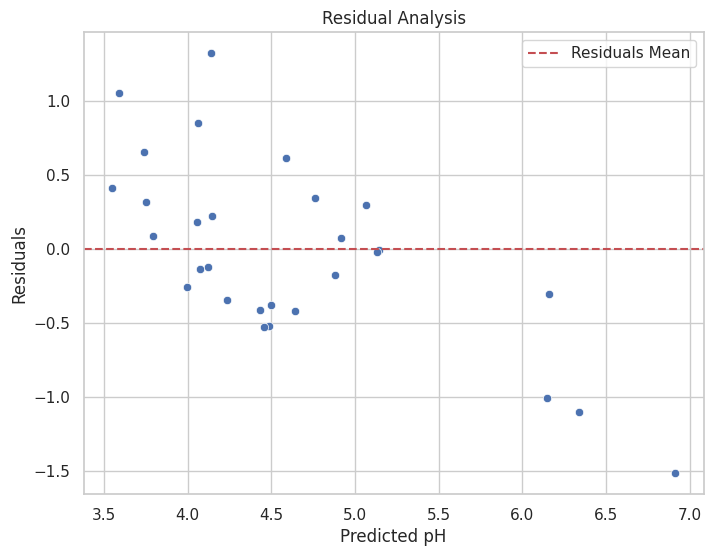

In [ ]:
# Model Evaluation
print(f'Mean Squared Error: {mse3}')
print(f'R-squared: {r2k}')

# Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Importance:")
print(coefficients)

# Residual Analysis
residuals = y3_test - y3_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y3_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel("Predicted pH")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Analysis")
plt.show()
